<a href="https://colab.research.google.com/github/osmarbolivar/Nowcast_MachineLearning_RemoteSensing/blob/main/Final_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDP Nowcasting: A machine learning and remote sensing data-based approach for Bolivia - RESULTS**

**Author:** Osmar Bolivar

In [168]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Data**

In [169]:
igae_nowcast = pd.read_excel('drive/MyDrive/Research/GDP Nowcast/LAJCB/Final CODES/igae_nowcast.xlsx', index_col=0)
g1_igae_nowcast = pd.read_excel('drive/MyDrive/Research/GDP Nowcast/LAJCB/Final CODES/g1_igae_nowcast.xlsx', index_col=0)

In [170]:
def calculate_metrics(g1_igae_nowcast):
    g1_metrics = pd.DataFrame(
        {"MSE": [mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['ridge'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['lasso'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['enet'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['dt'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['ada'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['gbr'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['rf'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['et'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['avg'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['w_avg'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['w_avg_best'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['gw_avg'], squared=False),
                 mean_squared_error(g1_igae_nowcast['igae'], g1_igae_nowcast['gw_avg_best'], squared=False)],
         "MAE": [mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['ridge']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['lasso']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['enet']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['dt']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['ada']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['gbr']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['rf']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['et']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['avg']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['w_avg']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['w_avg_best']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['gw_avg']),
                 mean_absolute_error(g1_igae_nowcast['igae'], g1_igae_nowcast['gw_avg_best'])],
         "R2": [r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['ridge']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['lasso']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['enet']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['dt']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['ada']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['gbr']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['rf']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['et']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['avg']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['w_avg']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['w_avg_best']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['gw_avg']),
                 r2_score(g1_igae_nowcast['igae'], g1_igae_nowcast['gw_avg_best'])]
        }, index=g1_igae_nowcast.columns[1:]
    )
    return g1_metrics

In [171]:
g1_metrics_full = calculate_metrics(g1_igae_nowcast[:'2022-09-01'])
g1_metrics_train = calculate_metrics(g1_igae_nowcast[:'2018-12-01'])
g1_metrics_val = calculate_metrics(g1_igae_nowcast['2019-01-01':'2022-09-01'])
g1_metrics_prepandemic = calculate_metrics(g1_igae_nowcast['2019-01-01':'2020-03-01'])
g1_metrics_ALL = pd.concat([g1_metrics_full, g1_metrics_train, g1_metrics_val, g1_metrics_prepandemic], axis=1)
g1_metrics_ALL.columns = ["RMSE (full)", "MAE (full)", "R2 (full)", "RMSE (train)", "MAE (train)", "R2 (train)", "RMSE (val)", "MAE (val)", "R2 (val)", "RMSE (pre)", "MAE (pre)", "R2 (pre)"]
g1_metrics_ALL.sort_values(["RMSE (full)"], inplace=True)
g1_metrics_ALL

,RMSE (full),MAE (full),R2 (full),RMSE (train),MAE (train),R2 (train),RMSE (val),MAE (val),R2 (val),RMSE (pre),MAE (pre),R2 (pre)
w_avg_best,1.799259,1.039894,0.932276,0.614759,0.457767,0.989079,2.749221,1.919553,0.888393,1.256012,0.856206,0.972025
gw_avg_best,1.799504,1.039577,0.932258,0.614948,0.457826,0.989073,2.749559,1.918668,0.888365,1.255639,0.855903,0.972041
gw_avg,1.843109,0.983349,0.928935,0.488432,0.377557,0.993106,2.858299,1.898768,0.879361,1.246061,0.820098,0.972466
w_avg,1.843513,0.983804,0.928904,0.488244,0.377469,0.993112,2.859001,1.900045,0.879301,1.247534,0.820917,0.972401
gbr,1.859693,0.737766,0.927650,0.079183,0.058928,0.999819,2.945352,1.763567,0.871900,0.916244,0.401206,0.985113
avg,1.886350,0.969324,0.925561,0.447112,0.353236,0.994223,2.938238,1.900301,0.872519,1.222792,0.788711,0.973485
ridge,1.995487,1.221937,0.916699,0.881832,0.670062,0.977529,2.970537,2.055880,0.869700,1.471884,1.054285,0.961582
enet,2.052364,1.244926,0.911882,0.855297,0.646483,0.978861,3.077640,2.149239,0.860135,1.433806,1.058056,0.963544
et,2.105912,1.065389,0.907224,0.447572,0.354797,0.994211,3.291464,2.139173,0.840025,1.543776,1.019500,0.957737
rf,2.200022,1.106550,0.898747,0.553987,0.424610,0.991132,3.419102,2.137036,0.827378,1.402754,0.992137,0.965106


In [172]:
nowcast_interval = pd.DataFrame(
    {"igae": g1_igae_nowcast['igae'],
     "max": g1_igae_nowcast.loc[:, 'ridge':'et'].max(axis=1),
     "min": g1_igae_nowcast.loc[:, 'ridge':'et'].min(axis=1),
     "nowcast": g1_igae_nowcast['w_avg_best']
    }, index=g1_igae_nowcast.index
)
nowcast_interval.loc['2022-10-01':, 'igae'] = np.nan

## **2. Visualization**

<ipython-input-173-9c418934ed80>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



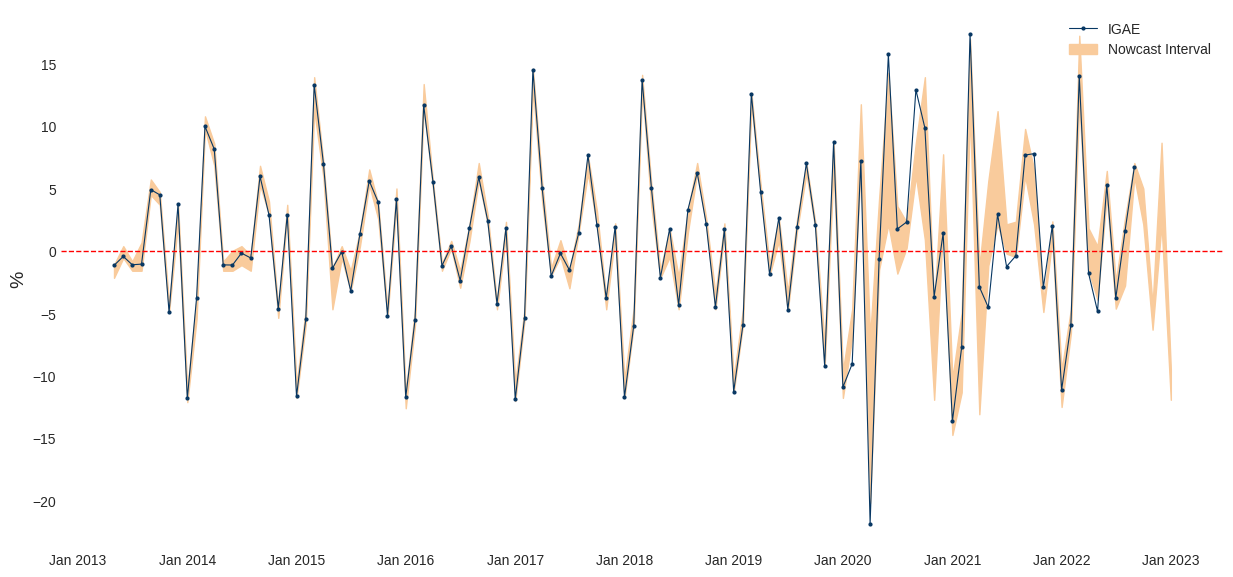

In [173]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(15, 7))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(nowcast_interval.index, nowcast_interval["igae"], label="IGAE", color='#073763', linewidth=0.8, marker='o', markersize=2)
ax.fill_between(nowcast_interval.index, nowcast_interval["min"], nowcast_interval["max"], alpha=1.0, color='#f9cb9c', label="Nowcast Interval")
ax.axhline(0, color='red', linestyle='--', linewidth=1)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_ylabel("%", fontsize=14)
ax.legend()
plt.show()

fig.savefig('/content/drive/MyDrive/Research/GDP Nowcast/LAJCB/Final CODES/Nowcast_interval_full.png', dpi=300, bbox_inches='tight')

<ipython-input-174-9c61ca327c77>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



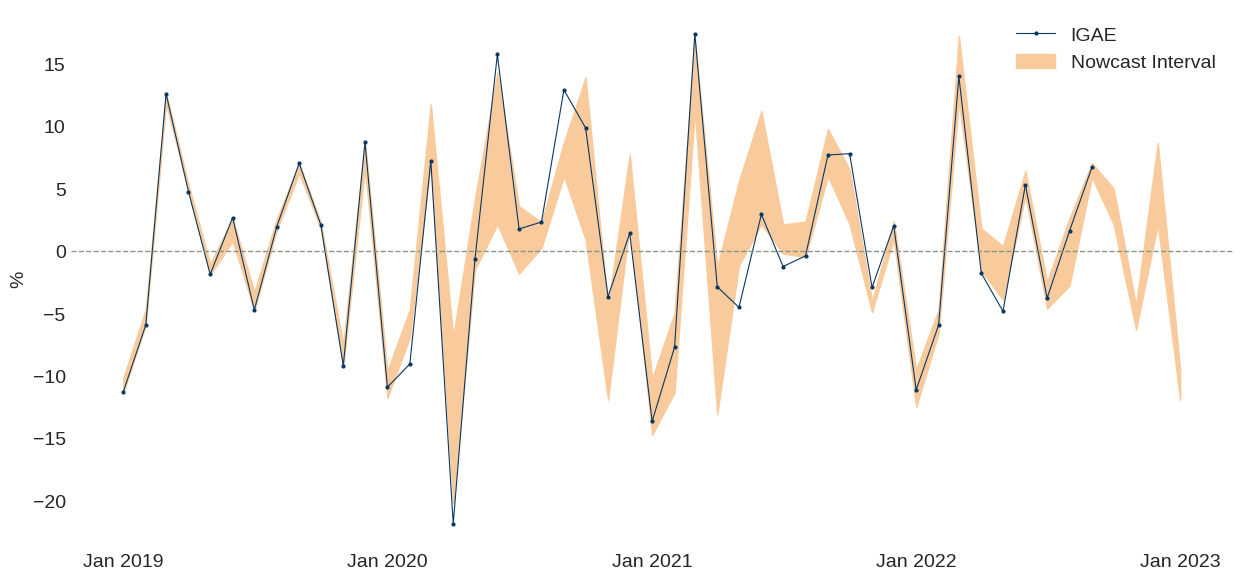

In [174]:
plt.style.use('seaborn-darkgrid')
fig2, ax2 = plt.subplots(figsize=(15, 7))
fig2.patch.set_facecolor('white')
ax2.set_facecolor('white')
ax2.plot(nowcast_interval['2019-01-01':].index, nowcast_interval.loc['2019-01-01':, "igae"], label="IGAE", color='#073763', linewidth=0.8, marker='o', markersize=2)
ax2.fill_between(nowcast_interval['2019-01-01':].index, nowcast_interval.loc['2019-01-01':,"min"], nowcast_interval.loc['2019-01-01':,"max"], alpha=1.0, color='#f9cb9c', label="Nowcast Interval")
ax2.axhline(0, color='#889486', linestyle='--', linewidth=1)
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax2.set_ylabel("%", fontsize=14)
ax2.legend(fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.show()

fig2.savefig('/content/drive/MyDrive/Research/GDP Nowcast/LAJCB/Final CODES/Nowcast_interval_val.png', dpi=300, bbox_inches='tight')

<ipython-input-175-e50f3a44b909>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



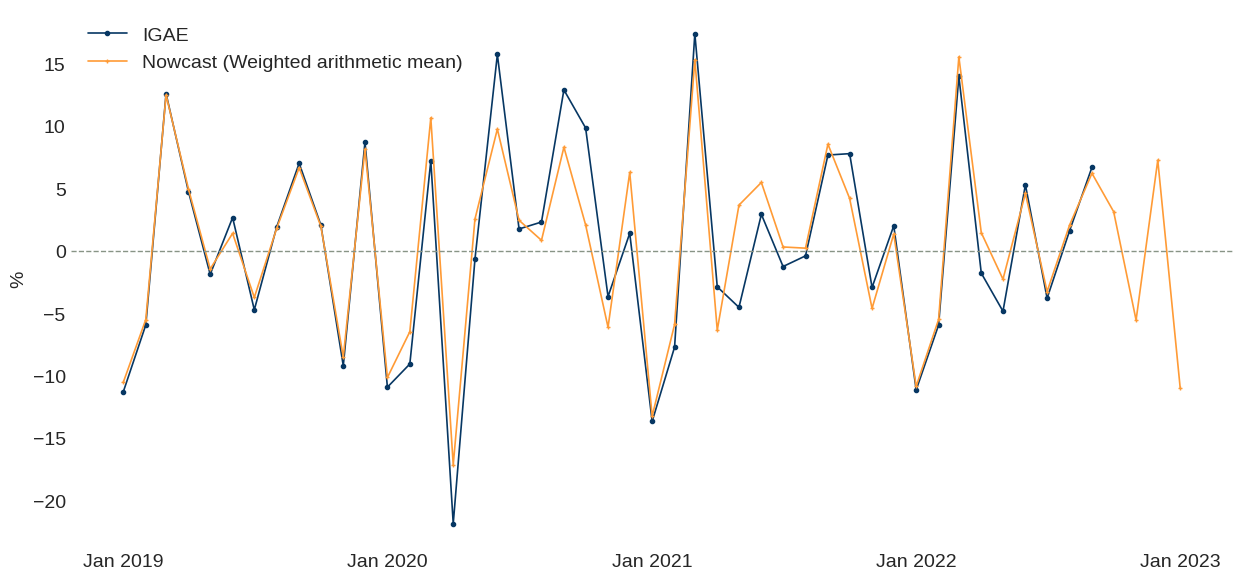

In [175]:
plt.style.use('seaborn-darkgrid')
fig3, ax3 = plt.subplots(figsize=(15, 7))
fig3.patch.set_facecolor('white')
ax3.set_facecolor('white')
ax3.plot(nowcast_interval['2019-01-01':].index, nowcast_interval.loc['2019-01-01':, "igae"], label="IGAE", color='#073763', linewidth=1.2, marker='o', markersize=3)
ax3.plot(nowcast_interval['2019-01-01':].index, nowcast_interval.loc['2019-01-01':, "nowcast"], label="Nowcast (Weighted arithmetic mean)", color='#ff9b36', linewidth=1.2, marker='+', markersize=3)
ax3.axhline(0, color='#889486', linestyle='--', linewidth=1)
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax3.set_ylabel("%", fontsize=14)
ax3.legend(fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)
plt.show()

fig3.savefig('/content/drive/MyDrive/Research/GDP Nowcast/LAJCB/Final CODES/Final_Nowcast_val.png', dpi=300, bbox_inches='tight')

In [176]:
def acumulado_mean(dataframe):
    # Calcula los valores (promedio) acumulados en niveles
    acum = dataframe.groupby(dataframe.index.year).expanding().mean().reset_index()
    acum = acum.set_index('level_1').iloc[:, 1:]
    acum.index.name = None
    # Generar crecimientos interanuales
    g12_acum = acum.pct_change(12) * 100
    g12_acum = g12_acum.dropna()

    return acum, g12_acum

In [177]:
for_cum = pd.DataFrame(
    {"igae": igae_nowcast.loc['2021-01-01':'2023-01-01', 'igae'],
     "ridge": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'ridge']], axis=0),
     "lasso": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'lasso']], axis=0),
     "enet": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'enet']], axis=0),
     "dt": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'dt']], axis=0),
     "ada": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'ada']], axis=0),
     "gbr": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'gbr']], axis=0),
     "rf": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'rf']], axis=0),
     "et": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'et']], axis=0),
     "avg": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'avg']], axis=0),
     "w_avg": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'w_avg']], axis=0),
     "w_avg_best": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'w_avg_best']], axis=0),
     "gw_avg": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'gw_avg']], axis=0),
     "gw_avg_best": pd.concat([igae_nowcast.loc['2021-01-01':'2022-09-01', 'igae'], igae_nowcast.loc['2022-10-01':'2023-01-01', 'gw_avg_best']], axis=0)
    }, index=igae_nowcast['2021-01-01':'2023-01-01'].index
)

acum, g12_acum = acumulado_mean(for_cum)

g12_acum['max'] = g12_acum.loc[:, ['ridge', 'enet', 'gbr']].max(axis=1) - g12_acum['gw_avg_best']
g12_acum['min'] = g12_acum['gw_avg_best'] - g12_acum.loc[:, ['ridge', 'enet', 'gbr']].min(axis=1)
g12_acum.loc['2022-10-01':'2023-01-01', 'igae'] = g12_acum.loc['2022-10-01':'2023-01-01', 'gw_avg_best']
g12_acum.loc[:'2022-09-01', ['max', 'min']] = np.nan

In [178]:
df_y = pd.DataFrame(
    {"y1": round(g12_acum['igae'], ndigits=1),
     "y1_col": "#f9cb9c",
     "min": round(g12_acum['min'], ndigits=1),
     "max": round(g12_acum['max'], ndigits=1)},
    index=g12_acum.index)

df_y.loc['2022-01-01':'2022-09-01', 'y1_col'] = "#073763"

x = df_y.index.strftime('%b-%y')
y1 = df_y['y1']
y1_colors = df_y['y1_col']
min_values = df_y['min']
max_values = df_y['max']

fig4 = go.Figure()
fig4.add_trace(go.Bar(
    x=x,
    y=y1,
    marker_color=y1_colors,
    marker_line=dict(width=1.5, color='#000000'),
    error_y=dict(
        type='data',
        symmetric=False,
        array=max_values,
        arrayminus=min_values,
        visible=True
    )
))

fig4.update_layout(
    font=dict(family='sans-serif', color="#000000"),
    plot_bgcolor='white',
    xaxis=dict(tickfont_size=18),
    yaxis=dict(title='%', titlefont_size=20, tickfont_size=20, linecolor="#000000", ticks='outside', nticks=10, zeroline=True, zerolinewidth=1.0, zerolinecolor='black'),
    hoverlabel=dict(font_size=20, font_family="sans-serif"),
    hovermode="x"
)

fig4.update_layout(
    width=1100,
    height=500
)

fig4.show()

## **3. Comparison with Econometric Models**

In [179]:
other_forecast = pd.read_excel('drive/MyDrive/Research/GDP Nowcast/LAJCB/Final CODES/other_forecast_val.xlsx', index_col=0)
train = pd.read_csv('drive/MyDrive/Research/GDP Nowcast/LAJCB/Final CODES/train_set.csv', index_col=0)

In [180]:
other_forecast['stepwise'] = (other_forecast['stepwise_scaled'] * train.std()[0] + train.mean()[0]) * 100
other_forecast['gets'] = (other_forecast['gets_scaled'] * train.std()[0] + train.mean()[0]) * 100
other_forecast['nowcast'] = g1_igae_nowcast.loc['2019-01-01':'2022-09-01', 'w_avg_best']
other_forecast['igae'] = g1_igae_nowcast.loc['2019-01-01':'2022-09-01', 'igae']

In [181]:
other_models_metrics = pd.DataFrame(
    {"RMSE": [mean_squared_error(other_forecast['igae'], other_forecast['nowcast'], squared=False),
             mean_squared_error(other_forecast['igae'], other_forecast['bsvar'], squared=False),
             mean_squared_error(other_forecast['igae'], other_forecast['stepwise'], squared=False),
             mean_squared_error(other_forecast['igae'], other_forecast['gets'], squared=False),
             mean_squared_error(other_forecast['igae'], other_forecast['sarima'], squared=False)],
     "MAE": [mean_absolute_error(other_forecast['igae'], other_forecast['nowcast']),
             mean_absolute_error(other_forecast['igae'], other_forecast['bsvar']),
             mean_absolute_error(other_forecast['igae'], other_forecast['stepwise']),
             mean_absolute_error(other_forecast['igae'], other_forecast['gets']),
             mean_absolute_error(other_forecast['igae'], other_forecast['sarima'])],
     "R2": [r2_score(other_forecast['igae'], other_forecast['nowcast']),
             r2_score(other_forecast['igae'], other_forecast['bsvar']),
             r2_score(other_forecast['igae'], other_forecast['stepwise']),
             r2_score(other_forecast['igae'], other_forecast['gets']),
             r2_score(other_forecast['igae'], other_forecast['sarima'])]
    }, index=["Nowcast", "BSVAR", "Stepwise", "GETS", "SARIMA"]
)

other_models_metrics.sort_values(['RMSE'], ascending=True, inplace=True)
other_models_metrics

,RMSE,MAE,R2
Nowcast,2.749221,1.919553,0.888393
Stepwise,3.774760,2.438027,0.789597
GETS,4.003111,2.479940,0.763371
BSVAR,5.040141,2.668925,0.624890
SARIMA,5.767831,3.340105,0.508755


In [182]:
other_forecast_errors = pd.DataFrame(
    {"Nowcast": other_forecast['igae'] - other_forecast['nowcast'],
     "Stepwise": other_forecast['igae'] - other_forecast['stepwise'],
     "GETS": other_forecast['igae'] - other_forecast['gets'],
     "BSVAR": other_forecast['igae'] - other_forecast['bsvar'],
     "SARIMA": other_forecast['igae'] - other_forecast['sarima']
    }, index=other_forecast.index
)

<ipython-input-183-993e2b443ffb>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



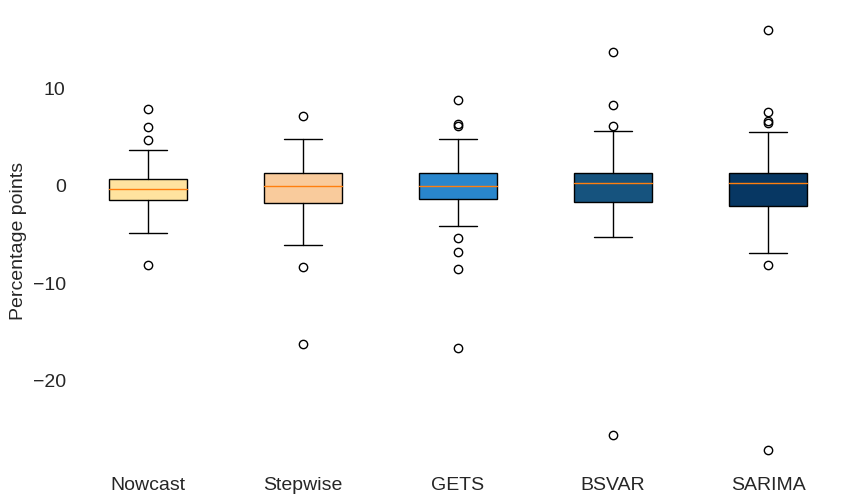

In [183]:
plt.style.use('seaborn-darkgrid')
fig5, ax5 = plt.subplots(figsize=(10, 6))
fig5.patch.set_facecolor('white')
ax5.set_facecolor('white')
bp = ax5.boxplot(other_forecast_errors, labels=other_forecast_errors.columns, patch_artist=True)
colors = ['#ffe39f', '#f9cb9c', '#2986cc', '#16537e', '#073763']
for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)
ax5.tick_params(axis='both', which='major', labelsize=14)
ax5.set_ylabel("Percentage points", fontsize=14)
plt.show()

fig5.savefig('/content/drive/MyDrive/Research/GDP Nowcast/LAJCB/Final CODES/Boxplot_forecast_errors.png', dpi=300, bbox_inches='tight')